In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
X=np.load('data/X.npy')
Y=np.load('data/Y.npy')
print(X.shape)

(100, 2)


In [3]:
Y.shape

(100,)

In [4]:
a=[1,2,3,4]
b=[4,5,8,11]

In [5]:
a=np.array(a)
b=np.array(b)

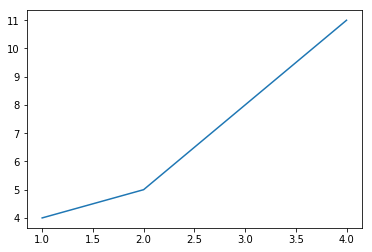

In [6]:
plt.plot(a,b)

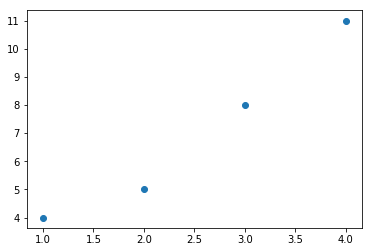

In [7]:
plt.scatter(a,b)

In [27]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

Text(0.5, 1.0, 'ABCD')

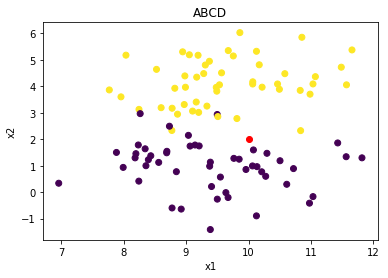

In [8]:
x1=X[ : ,0]
x2=X[ : ,1]
plt.scatter(x1,x2,c=Y)
plt.scatter(10,2,c='Red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('ABCD')


In [36]:
np.sum((np.array([11,12])-np.array([10,9]))**2)

10

In [43]:
X.shape

(100, 2)

In [9]:
def dist(a,b):
    return np.sum(((a-b)**2)**.5)

In [38]:
def knn(X,Y,test_pt,k=5):
    d=[]
    m=X.shape[0]
    for i in range(m):
        c_dis=dist(X[i],test_pt)
        d.append((c_dis,Y[i]))
    d.sort()
    d=np.array(d[0:k])
    d=d[:,1]
    uniq,occ=np.unique(d,return_counts=True)
    print('u+C',uniq,occ)
    idx=np.argmax(occ)
    print('idx',idx)
    pred=uniq[idx]
    
    return int(pred)

In [39]:
knn(X,Y,[10,2])

u+C [0. 1.] [4 1]
idx 0


0

In [12]:
X.shape

(100, 2)

In [13]:
face_detector=cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [14]:
cam=cv2.VideoCapture(0)
cnt=0
pics=[]
while True:
    
    b,img=cam.read()
    if b==False:
        continue
    faces=face_detector.detectMultiScale(img,1.06,5)
    
    if (len(faces)==0):
        continue
    
    
    #for f in faces:
    f=faces[0]
    x,y,w,h=f
    green=(0,255,0)
    cv2.rectangle(img,(x,y),(x+w,y+h),green,5)
    cropimg=img[y:y+h,x:x+w]
    cv2.imshow('C Face',cropimg)
    cnt+=1
    if(cnt%10==0):
        print('saving pic',cnt/10)
        cropimg=cv2.resize(cropimg,(100,100))
        pics.append(cropimg)
    if(cnt/10==20):
        break
            
    cv2.imshow("Title",img)
    cv2.waitKey(1)
cam.release()
cv2.destroyAllWindows()
pics = np.array(pics)
print(pics.shape)

np.save(name+".npy",pics)
print("Images saved to disk")

saving pic 1.0
saving pic 2.0
saving pic 3.0
saving pic 4.0
saving pic 5.0
saving pic 6.0
saving pic 7.0
saving pic 8.0
saving pic 9.0
saving pic 10.0
saving pic 11.0
saving pic 12.0
saving pic 13.0
saving pic 14.0
saving pic 15.0
saving pic 16.0
saving pic 17.0
saving pic 18.0
saving pic 19.0
saving pic 20.0
(20, 100, 100, 3)


NameError: name 'name' is not defined